**_<u>3rd Data Science Project ==\>\></u>_**

The dataset i have been using in this Data Science project is the housing price data from boston, Massachusetts, USA. The variables used in the dataset are not for individual households, but for groups of households known as "census tracts".

For this project, I assume that the data is from a sample of census tracts in the Boston area, not all census tracts.

In [100]:
#Loading Python packages which will be used in this project
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import math
import statsmodels.api as sm
from scipy import stats as ss
import statsmodels.stats.weightstats as ws
from statsmodels.stats.power import tt_ind_solve_power
 
# Load the dataset and printing it
boston = load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [101]:
# Creating a dataframe using pandas package and getting its shape
df_boston = pd.DataFrame(boston.data, columns = boston.feature_names)
df_boston.shape

(506, 13)

In [102]:
# How the data is present, head() will give few top rows
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [103]:
# Adding MEDV attribute to my dataframe, MEDV means Median Value of owner-occupied homes in 1000$
df_boston['MEDV'] = boston.target
df_boston['MEDV']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [104]:
# Checking for any null or missing values so that they can be removed from the dataframe for best results, but there are no null values in the dataframe
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**<u>QUESTION 1</u>**

In [105]:
# I have selected RM from boston dataset which means Average number of rooms per dwelling, now calculating its mean and standard deviation
print(df_boston['RM'].mean())
print(df_boston['RM'].std())

6.284634387351779
0.7026171434153233


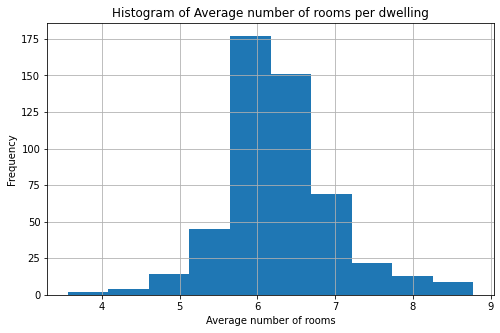

Text(0, 0.5, 'Frequency')

In [106]:
# Plotting a histogram of my selected variable RM 
ax= plt.figure(figsize=(8,5)).gca()
df_boston['RM'].plot.hist(ax=ax, grid=True)
plt.title('Histogram of Average number of rooms per dwelling')
plt.xlabel('Average number of rooms')
plt.ylabel('Frequency')

In [107]:
# Assessing the relationship of the target variable MEDV and my target variable RM by the correlation between them. 
corr_mat = df_boston[['RM', 'MEDV']].corr().round(2)
corr_mat.iloc[0,1]

0.7

The correlation between MEDV and RM is 0.7 which shown a strong positive realtion between them.

In [108]:
# Sorting the values of dataframe by RM
df_boston = df_boston.sort_values(by=['RM'])

Regression is used to predict one variable, and MEDV is the variable i am going to predict. In regression, this is done by generating an equation that predicts the outcome from one or more predictors. I have selected RM as my predictor. For regression model, i am using OLS (Ordinary Least Squares) from the Statsmodels package. After fitting the model, summary() is used to display the statistics.

In [109]:
predictors = sm.add_constant(df_boston['RM'], prepend=False)
Reg_mod = sm.OLS(df_boston['MEDV'], predictors).fit()
print(Reg_mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           2.49e-74
Time:                        18:56:52   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             9.1021      0.419     21.722      0.0

From the results, i am getting the coefficients, the intercept (shown as `const`) and the slope coefficient (shown as `RM`). Now Regression equation can be made using these values for Predicting MEDV

MEDV' = -34.67 + 9.10(RM)

There is a standard error, \_t\_-test, and \_p\_-value (in R, called `Pr(>|t|)`) shown. As we see, the intercept is significant, meaning that i am confident it is "not zero." It is also given in table that the "R squared" is 0.484. It represents the proportion of the variance (i.e 48%) in the outcome (`MEDV`) that is explained by the predictor RM. The "R squared" is, basically, a goodness-of-fit measure. The better our model, the higher the "R squared" and the smaller the residuals. The residuals represent unexplained variation in the MEDV' scores. I will also calculate residuals later.

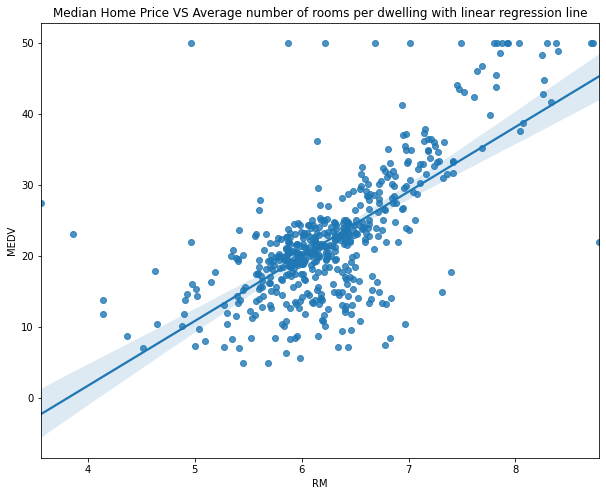

Text(0.5, 1.0, 'Median Home Price VS Average number of rooms per dwelling with linear regression line')

In [110]:
# Generating the regression line between RM and MEDV through sns.regplot
ax = plt.figure( figsize=(10,8)).gca()
sns.regplot( x="RM", y="MEDV", data=df_boston, ax=ax)
plt.title("Median Home Price VS Average number of rooms per dwelling with linear regression line")

In [111]:
## Create a new data frame with the predictor value and the constant
RM_predict = df_boston['RM']
RM_predict = sm.add_constant(RM_predict, prepend = False)
## Make prediction with new values
RM_predict['Score'] = Reg_mod.predict(RM_predict)
## Compute the residuals 
RM_predict['Residuals'] = df_boston['MEDV'] - RM_predict['Score']


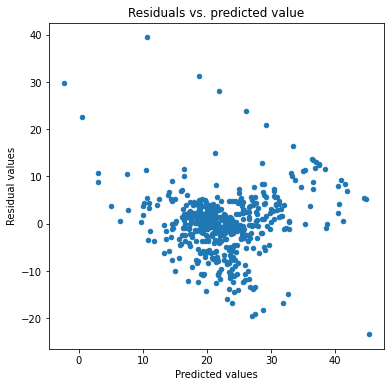

Text(0.5, 0, 'Predicted values')

In [112]:
# Creating Residuals vs Predicted Values of MEDV
ax = plt.figure(figsize=(6, 6)).gca() # define axis
RM_predict.plot.scatter(x='Score',y='Residuals', ax = ax)
plt.title('Residuals vs. predicted value')
plt.ylabel("Residual values")
plt.xlabel('Predicted values')

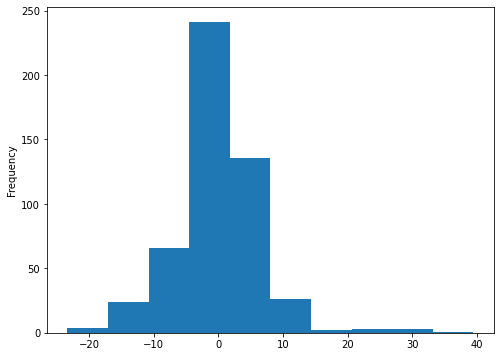

<AxesSubplot:ylabel='Frequency'>

In [113]:
# Generating the histogram of residuals
ax = plt.figure(figsize=(8, 6)).gca() # define axis
RM_predict.Residuals.plot.hist(ax = ax)

These residuals are trying to be Normally distributed near the mean but it is still not forming that uniform bell curve. This means that I have not tend to under-predict (negative values) just as much as we over-predict (positive values). It is beacuse of some outliers in the data. Now calculate "residual standard error" which is basically the "average residual." I am using mean\_squared\_error() of sklearn.metrics

In [114]:
MSE = mean_squared_error(df_boston.MEDV, RM_predict['Score'])
numdata = df_boston.shape[0]

RSE = math.sqrt(MSE/(numdata-2))
print(RSE)

0.2941241766533365


As RSE is 0.29, so i have decided to upgrade to Polynomial regression, just to fit the curve instead of line, to increase R-squared and decrease RSE. It will also increase the model performance.

  

To convert the original features of RM into their higher terms i am using PolynomialFeatures class provided by scikit-learn.

In [115]:
X = df_boston[['RM']]

polynomial_features= PolynomialFeatures(degree=3)
X_poly = polynomial_features.fit_transform(X)
X_poly.shape

(506, 4)

In [116]:
# Now fitting Polynomial version of X (or RM) into my regression model
Reg_mod = sm.OLS(df_boston['MEDV'], X_poly).fit()
print(Reg_mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     214.0
Date:                Sun, 20 Jun 2021   Prob (F-statistic):           2.14e-89
Time:                        18:56:56   Log-Likelihood:                -1631.8
No. Observations:                 506   AIC:                             3272.
Df Residuals:                     502   BIC:                             3289.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        241.3108     47.327      5.099      0.0

Other than all the statistics shown in this table, first consider "R squared", its value is increased to 0.561 (or 56%) which shows improvement. Now use this model for prediction and then generate the regression line.

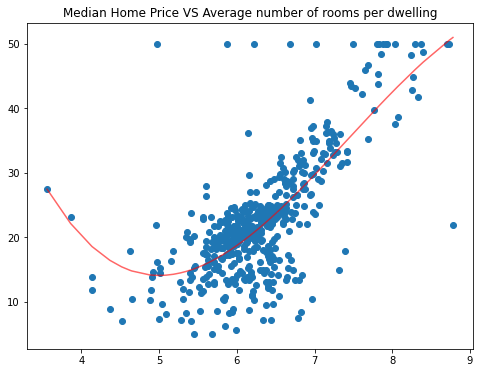

Text(0.5, 1.0, 'Median Home Price VS Average number of rooms per dwelling')

In [117]:
y_pred = Reg_mod.predict(X_poly)

plt.figure( figsize=(8,6)).gca()
plt.scatter(df_boston.RM, df_boston.MEDV)
plt.plot(df_boston.RM, y_pred, color = 'red', alpha=0.6)
plt.title("Median Home Price VS Average number of rooms per dwelling")

Look at this regression curve, it tries to cover maximum points with low residual error. We can increase the performance by increasing the degree of the polynomial. Now computing the residuals of this polynomial regression and generating its histogram.

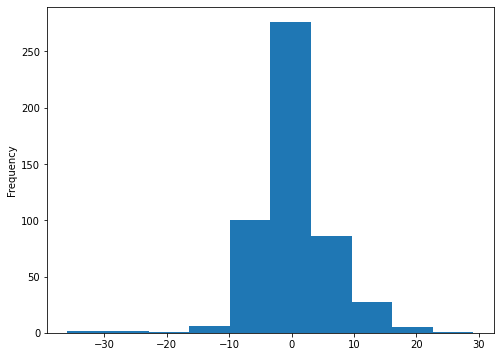

<AxesSubplot:ylabel='Frequency'>

In [118]:
Residuals = y_pred - df_boston['MEDV']

ax = plt.figure(figsize=(8, 6)).gca() # define axis
Residuals.plot.hist(ax = ax)

Histogram is also showing a little improvement. It can be seen in the value of RSE which also gets decreased a little bit.

In [119]:
MSE = mean_squared_error(df_boston.MEDV, y_pred)
numdata = df_boston.shape[0]

RSE = math.sqrt(MSE/(numdata-2))
print(RSE)

0.27109833097099273


**<u>QUESTION 2</u>**

Alternative hypothesis is 

Ha : Charles River ( CHAS) will have higher median price ( MEDV) than those that do not

And so the Null hypothesis is 

Ho: Charles River ( CHAS) will have lower or equal median price (MEDV)

To perform test for these hypotheses, firstly formulate the two groups according to the condition given in these hypotheses

In [120]:
chas_1 = df_boston[df_boston.CHAS == 1.0]['MEDV']
chas_0 = df_boston[df_boston.CHAS == 0.0]['MEDV']

In [121]:
mean1 = chas_1.mean()
mean0 = chas_0.mean()
print(mean1, mean0)

28.439999999999998 22.093842887473464


According to the two hypotheses, NOW

Alternative Hypothesis Ha: mean1 \> mean0

Null Hypothesis Ho: mean1\<= mean0

As we are observing that mean1 is greater than mean0 which is also our alternative hypothesis, and the null hypothesis is that the difference between the group averages is exactly zero or less. Any difference observed in our sample is therefore due to random chance. We run our _t_\-test to consider this possibility.

I am using ttest\_ind() from the scipy.stats package to compute the t statistic and p-value

In [122]:
diff = mean1 - mean0

res = ss.ttest_ind(chas_1, chas_0)

print('Difference in means = %4.3f' %diff )
print('T-Statistics = %4.3f' %res[0])
print('p-Value < %4.3e' %res[1]  )

Difference in means = 6.346
T-Statistics = 3.996
p-Value < 7.391e-05


The t-value of 3.996 tells us that the difference between our groups is 3.996 times larger than would be expected typically by chance. How often would a result this big happen if the null were actually true? The p-value is 0.00007391, so only 0.007% of the time. This is sufficient to reject the null (p \< .05), and we can conclude that our alternative hypothesis Ha is true which states that "Those Census tracts who has Charles River ( CHAS) will have higher median price ( MEDV) than those that do not"

For the Confidence Interval, i have used tconfint\_diff from statsmodels.stats.weightstats, keeping in consideration 90% confidence.

In [123]:
means = ws.CompareMeans(ws.DescrStatsW(chas_1), ws.DescrStatsW(chas_0))
# Confidence inerval of 90%
confint = means.tconfint_diff(alpha=0.10, usevar='unequal') 
degfree = means.dof_satt()

print('Degree of Freedom = %4.3f' %degfree)
print('Upper Confidence Interval = %f' %confint[1])
print('Lower Confidence Interval = %f' %confint[0])

Degree of Freedom = 36.876
Upper Confidence Interval = 9.785438
Lower Confidence Interval = 2.906876


We also have a 90% CI on the size of the difference, and we are fairly confident that the Census tracts who has Charles River ( CHAS) will have higher median price ( MEDV) greater but in the range of 9.78 to 2.90 above.

Assumimg the effect size of 0.6 with 80% power, group size can be determined by tt\_ind\_solve\_power function of statsmodels.stats.power

In [124]:
tt_ind_solve_power(effect_size=0.6, nobs1 = None, alpha=0.05, power=0.80, ratio=1, alternative='two-sided')

44.58579025908025

Hence shown from the above result, this study would require upto 45 people per group ( best to round up ). In total 90 people will be required.